## Practice 3. 국가 군집화

데이터 셋: https://www.kaggle.com/datasets/ashydv/country-socioeconomic-data  
참고 자료: https://www.kaggle.com/code/ashydv/country-clustering-hierarchical-clustering-pca

각 국가별 사회적, 경제적 지표들이 들어있는 데이터 셋이 주어집니다.

- country: 국가 이름
- child_mort: 1000명당 5세 미만 아동 사망률
- exports: 상품 및 서비스 수출. 총 GDP 대비 백분율로 표시됨
- health: 총 건강 지출. 총 GDP 대비 백분율로 표시됨
- imports: 상품 및 서비스 수입. 총 GDP 대비 백분율로 표시됨
- Income: 개인 당 순소득
- Inflation: 총 GDP의 연간 성장률 측정
- life_expec: 현재 사망률 패턴이 지속된다고 할 때, 신생아의 평균 수명
- total_fer: 현재의 연령별 출산율이 유지된다고 할 때, 각 여성당 출산될 아이의 수
- gdpp: 1인당 GDP. 총 GDP를 총 인구로 나눈 값
- region_1: 지역 구분 1
- region_2: 지역 구분 2
- continent: 대륙

이 데이터를 활용하여 국가들을 군집화 하고 싶습니다. 계층적 군집 분석을 다양하게 활용해보세요. 대륙은 다르지만 같은 군집으로 분류되는 국가들은 어떤 특징을 가지고 있는지 분석해보세요. 

In [2]:
## 12일까지 과제
## 건강 관련만 묶에서 군집 - 경제 관련 묶어서 군집

### 출생률에 따른 클러스터링을 해보자자

In [1]:
import pandas as pd

df = pd.read_csv("./data/countries.csv", encoding="utf-8")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,region_1,region_2,continent,latitude,longitude
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Southern Asia,NaN,Asia,33.939110,67.709953
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Southern Europe,NaN,Europe,41.153332,20.168331
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Northern Africa,NaN,Africa,28.033886,1.659626
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,Middle Africa,Sub-Saharan Africa,Africa,-11.202692,17.873887
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Caribbean,Latin America and the Caribbean,North America,17.060816,-61.796428


In [2]:
df_del = df.drop(["country","region_1", "region_2", "continent", "longitude", "latitude"], axis=1)
df_del.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


In [3]:
df_c = df.drop(["region_1", "region_2", "continent", "longitude", "latitude"], axis=1)
df_c.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


In [6]:
column = (df_c.columns).to_list()
column = column[1:]
column

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [8]:
df.shape

(167, 15)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    float64
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    float64
 10  region_1    167 non-null    object 
 11  region_2    66 non-null     object 
 12  continent   167 non-null    object 
 13  latitude    167 non-null    float64
 14  longitude   167 non-null    float64
dtypes: float64(11), object(4)
memory usage: 19.7+ KB


In [98]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,latitude,longitude
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689,19.485289,19.474636
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809,24.637862,63.885621
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000,-40.900557,-175.198242
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000,4.064895,-6.319850
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,18.109581,20.939444
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000,40.303386,49.577080
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,64.963051,179.414413


In [99]:
df.isnull().sum()

country         0
child_mort      0
exports         0
health          0
imports         0
income          0
inflation       0
life_expec      0
total_fer       0
gdpp            0
region_1        0
region_2      101
continent       0
latitude        0
longitude       0
dtype: int64

In [100]:
# print(df.index.values)

In [101]:
# df.index.unique()

## EDA

In [102]:
# 저출생인 나라의 경제적 건강 관련 특징을 알고 싶음

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

### 출생률 높은 나라 10, 낮은 나라 10

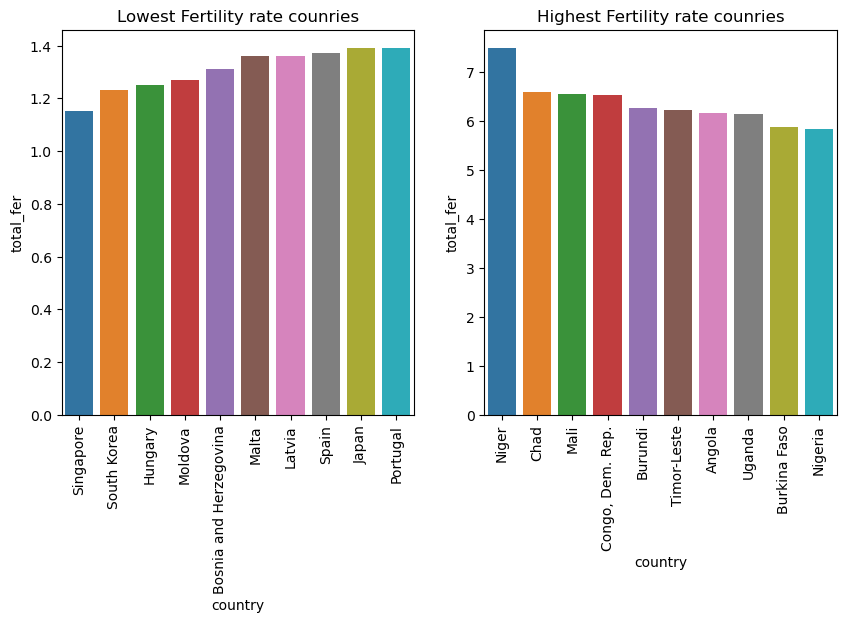

In [146]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
top10_lowest_total_fer = df[["country", "total_fer"]].sort_values('total_fer', ascending = True).head(10)
sns.barplot(x='country',y='total_fer',  data= top10_lowest_total_fer)
plt.xlabel = "country"
plt.ylabel = "total_fer"
plt.xticks(rotation=90)
plt.title("Lowest Fertility rate counries")


plt.subplot(1,2,2)
top10_highest_total_fer = df[["country", "total_fer"]].sort_values('total_fer', ascending = False).head(10)
sns.barplot(x='country', y='total_fer', data= top10_highest_total_fer)
plt.xlabel = "country"
plt.ylabel = "total_fer"
plt.xticks(rotation=90)
plt.title("Highest Fertility rate counries")

  
plt.show()

### health-care 높은 나라, 낮은 나라라

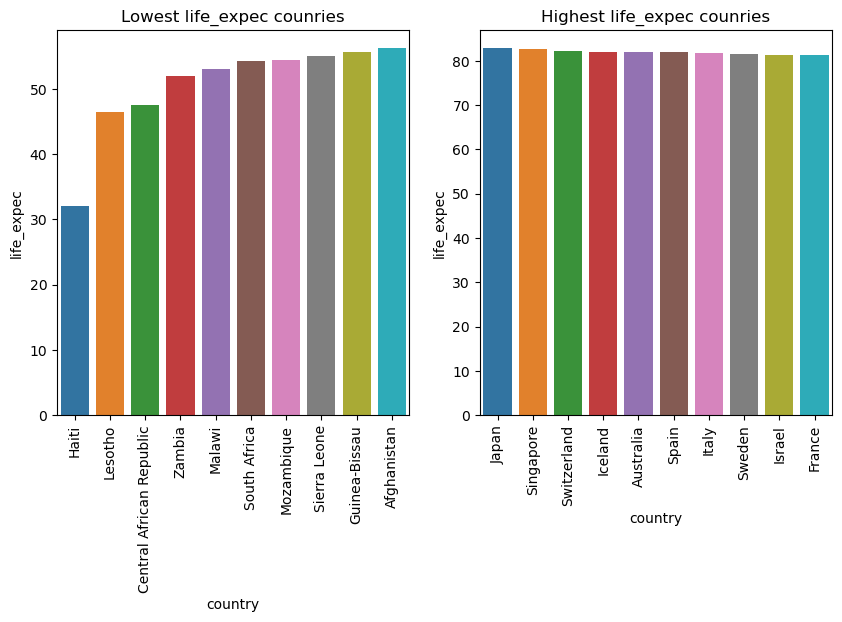

In [155]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
lowest_health = df[["country", "life_expec"]].sort_values('life_expec', ascending = True).head(10)
sns.barplot(x='country',y='life_expec',  data= lowest_health)
plt.xlabel = "country"
plt.ylabel = "life_expec"
plt.xticks(rotation=90)
plt.title("Lowest life_expec counries")


plt.subplot(1,2,2)
highest_health = df[["country", "life_expec"]].sort_values('life_expec', ascending = False).head(10)
sns.barplot(x='country', y='life_expec', data= highest_health)
plt.xlabel = "country"
plt.ylabel = "life_expec"
plt.xticks(rotation=90)
plt.title("Highest life_expec counries")

  
plt.show()

### Income 높은, 낮은 나라

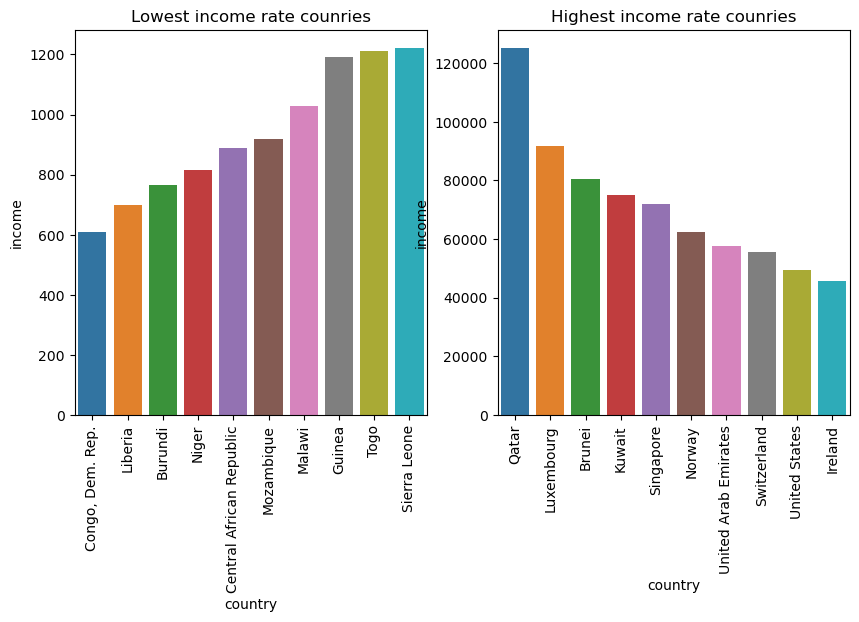

In [30]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
lowest_income = df[["country", "income"]].sort_values('income', ascending = True).head(10)
sns.barplot(x='country',y='income',  data= lowest_income)
plt.xlabel = "country"
plt.ylabel = "income"
plt.xticks(rotation=90)
plt.title("Lowest income rate counries")


plt.subplot(1,2,2)
highest_income = df[["country", "income"]].sort_values('income', ascending = False).head(10)
sns.barplot(x='country', y='income', data= highest_income)
plt.xlabel = "country"
plt.ylabel = "income"
plt.xticks(rotation=90)
plt.title("Highest income rate counries")

  
plt.show()

### gdpp 높은, 낮은 나라

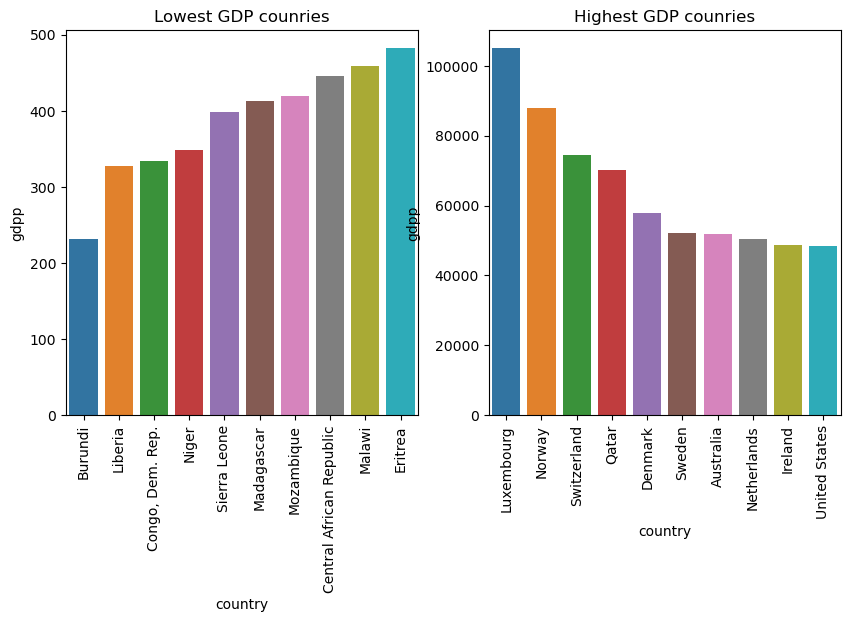

In [33]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
lowest_gdpp = df[["country", "gdpp"]].sort_values('gdpp', ascending = True).head(10)
sns.barplot(x='country',y='gdpp',  data= lowest_gdpp)
plt.xlabel = "country"
plt.ylabel = "gdpp"
plt.xticks(rotation=90)
plt.title("Lowest GDP counries")


plt.subplot(1,2,2)
highest_gdpp = df[["country", "gdpp"]].sort_values('gdpp', ascending = False).head(10)
sns.barplot(x='country', y='gdpp', data= highest_gdpp)
plt.xlabel = "country"
plt.ylabel = "gdpp"
plt.xticks(rotation=90)
plt.title("Highest GDP counries")

  
plt.show()

### 히트맵

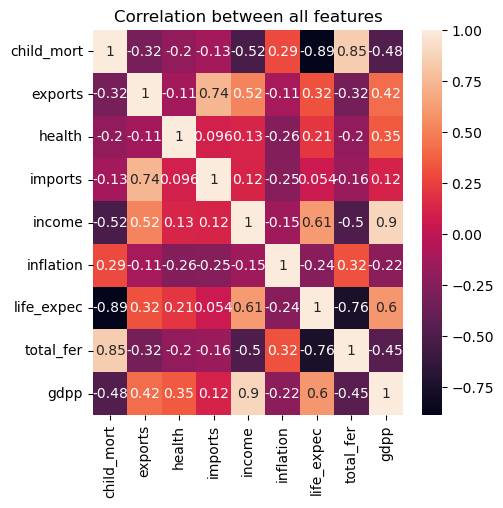

In [148]:
plt.figure(figsize=(5,5))
sns.heatmap(df_del.corr(),annot=True)
plt.title('Correlation between all features')
plt.show()

In [152]:
df_corr = df_del[["total_fer", "gdpp", "income", "life_expec"]]

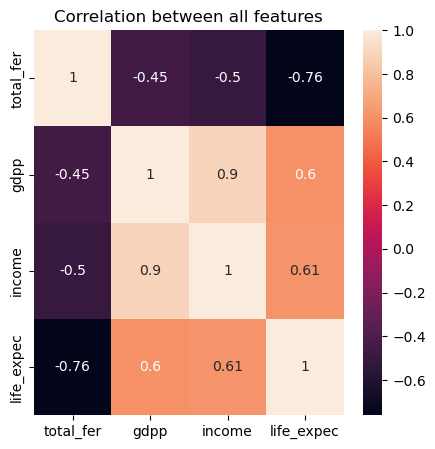

In [153]:
plt.figure(figsize=(5,5))
sns.heatmap(df_corr.corr(),annot=True)
plt.title('Correlation between all features')
plt.show()

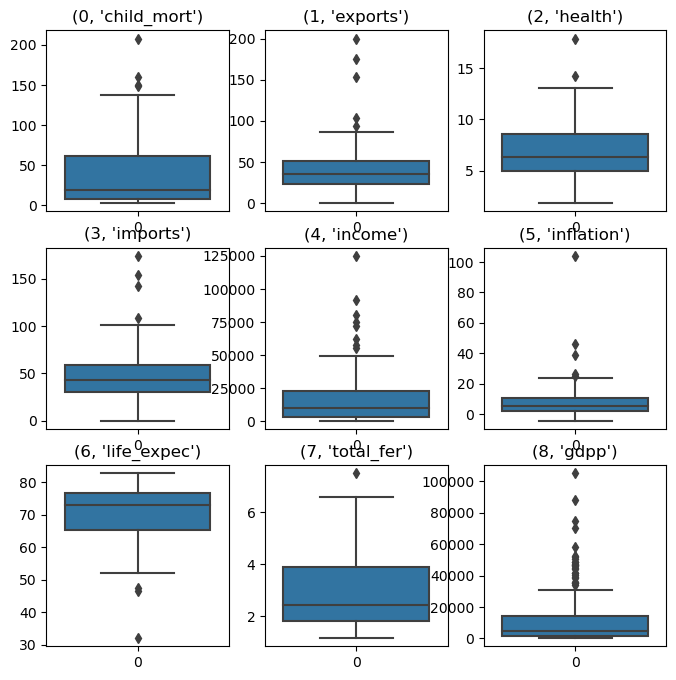

In [154]:
plt.figure(figsize=(8,8))

features = df_c.columns[1:10]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    plt.title(i)
    sns.boxplot(df_c[i[1]])

#### outlier 지우기

In [7]:
def outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr

    for i in range(len(df)):
        if df[column].iloc[i] > upper_bound:
            df[column].iloc[i] = upper_bound
        if df[column].iloc[i] < lower_bound:
            df[column].iloc[i] = lower_bound

            
for feature in column:
    outliers(df_del, feature)

## Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_train = df_del[column]
data_train[column] = scaler.fit_transform(data_train)

In [9]:
data_train.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.624488,0.106853,0.468725,0.441676,0.019490,0.481142,0.234532,0.797268,0.009788
1,0.099804,0.301309,0.385053,0.478126,0.181489,0.306662,0.812950,0.085361,0.117298
2,0.176083,0.413662,0.191714,0.308683,0.239318,0.715897,0.818705,0.297055,0.128545
3,0.829799,0.671856,0.084484,0.421973,0.103021,0.937963,0.346763,0.855314,0.100277
4,0.054892,0.490364,0.342811,0.579594,0.360038,0.199154,0.827338,0.167307,0.363810


## Clustering
## 1.) k-means clustering

In [10]:
from sklearn.cluster import KMeans

def train_model(num_cluster, data):
    model = KMeans(
        n_clusters=num_cluster,        
        random_state=1234                
    )
    model.fit(data)
    return model

In [11]:
model = train_model(num_cluster=4, data=data_train[["total_fer", "income", "life_expec", "gdpp"]])
print(model.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


7.736392432327255


In [12]:
def elbow_method(data):
    inertia_list = []
    for i in range(2, 11):
        model = train_model(i, data)
        inertia_list.append(model.inertia_)
    return inertia_list

In [13]:
columns = ["total_fer", "income", "life_expec", "gdpp"] 
data = data_train[columns].values
inertia_list = elbow_method(data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [14]:
inertia_list

[22.11664600543208,
 9.987299114375867,
 7.736392432327255,
 6.517949804819724,
 5.5879943679616115,
 4.9612315926672785,
 4.216548504252401,
 3.7773738273163855,
 3.5239991521592224]

### elbow method로 k값 정하기

In [15]:
from matplotlib import pyplot as plt
def plot_inertia(inertia_list, columns):
    plt.plot(range(2,11), inertia_list, marker="o", label="inertia")
    plt.title(f"{'-'.join(columns)} K-means clustering inertia")
    plt.xlabel("num_clusters")
    plt.ylabel("inertia")
    plt.legend()

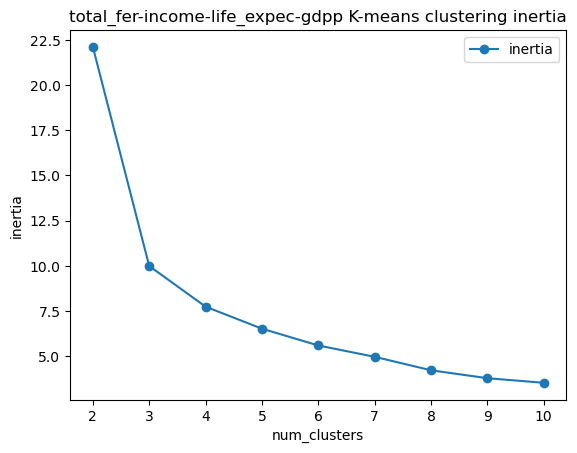

In [16]:
plot_inertia(inertia_list, columns)

In [17]:
K = 3
model = train_model(num_cluster=K, data=data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
k_label = model.labels_
k_label

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0,
       2, 1, 0, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2])

In [19]:
data_train_k = data_train.copy()
data_train_k["country"] = df["country"]
data_train_k["label"] = k_label
data_train_k.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,label
0,0.624488,0.106853,0.468725,0.441676,0.019490,0.481142,0.234532,0.797268,0.009788,Afghanistan,2
1,0.099804,0.301309,0.385053,0.478126,0.181489,0.306662,0.812950,0.085361,0.117298,Albania,0
2,0.176083,0.413662,0.191714,0.308683,0.239318,0.715897,0.818705,0.297055,0.128545,Algeria,0
3,0.829799,0.671856,0.084484,0.421973,0.103021,0.937963,0.346763,0.855314,0.100277,Angola,2
4,0.054892,0.490364,0.342811,0.579594,0.360038,0.199154,0.827338,0.167307,0.363810,Antigua and Barbuda,0


In [20]:
data_train_k["label"].value_counts()

label
0    76
2    53
1    38
Name: count, dtype: int64

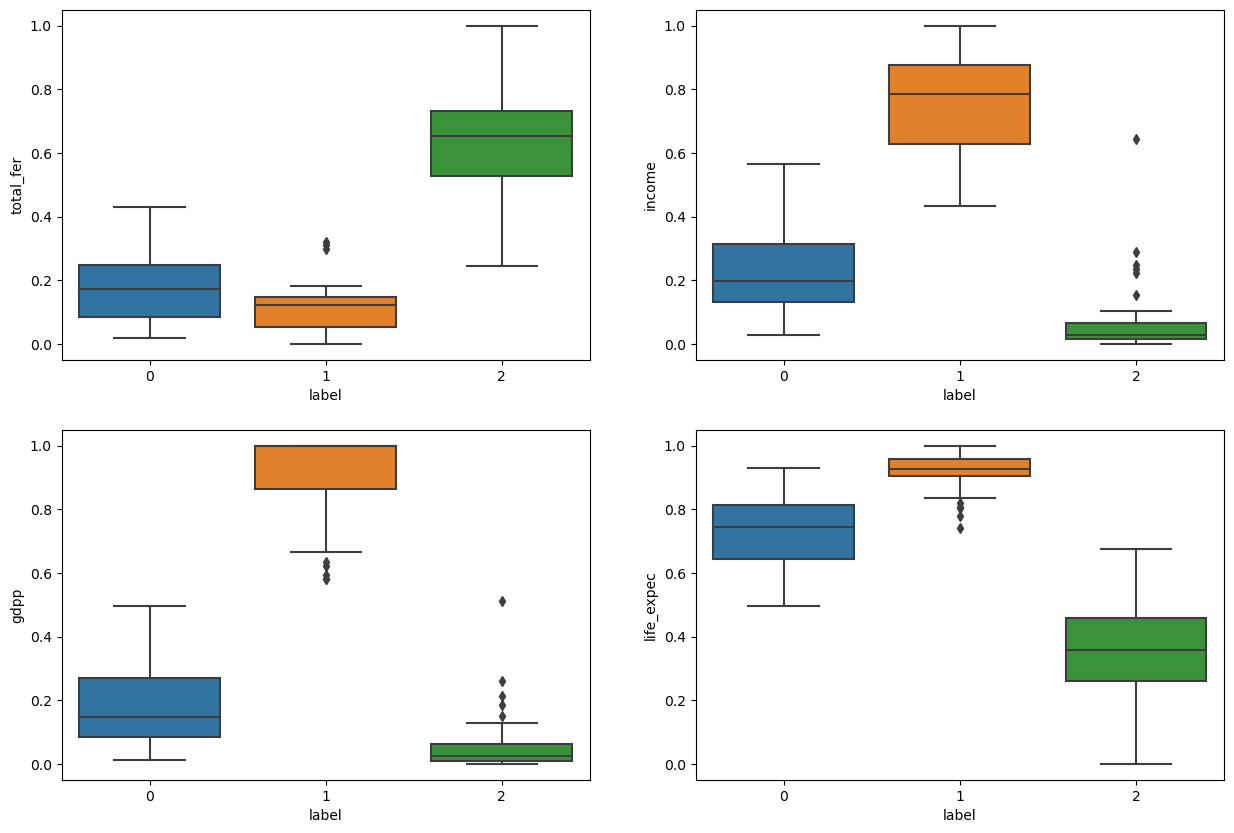

In [173]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x='label',y='total_fer',data=data_train_k)

plt.subplot(2,2,2)
sns.boxplot(x='label',y='income',data=data_train_k)

plt.subplot(2,2,3)
sns.boxplot(x='label',y='gdpp',data=data_train_k)

plt.subplot(2,2,4)
sns.boxplot(x='label',y='life_expec',data=data_train_k)

plt.show()

In [34]:
data_train_k[["total_fer", "income", "gdpp", "life_expec"]].describe()

,total_fer,income,gdpp,life_expec
count,167.000000,167.000000,167.000000,167.000000
mean,0.306458,0.298151,0.307617,0.650756
std,0.257032,0.296099,0.352960,0.245253
min,0.000000,0.000000,0.000000,0.000000
25%,0.110115,0.053467,0.033405,0.496403
50%,0.215109,0.182073,0.134624,0.720863
75%,0.466069,0.432080,0.420043,0.827338
max,1.000000,1.000000,1.000000,1.000000


In [47]:
data_train_k[data_train_k['label']==0][["total_fer", "income", "gdpp", "life_expec"]].describe()

,total_fer,income,gdpp,life_expec
count,76.000000,76.000000,76.000000,76.000000
mean,0.173372,0.225050,0.184955,0.724725
std,0.096470,0.121877,0.126465,0.104209
min,0.017072,0.026889,0.010973,0.496403
25%,0.083653,0.130232,0.083711,0.643165
50%,0.172429,0.196482,0.146479,0.745324
75%,0.247546,0.312334,0.268671,0.812950
max,0.428510,0.564483,0.497553,0.930935


In [48]:
76 / 167 * 100

45.50898203592814

In [49]:
data_train_k[data_train_k['label']==0].sort_values(by=['total_fer'],ascending=[False]).head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,label
78,0.131884,0.520612,0.506093,0.679093,0.172532,0.445541,0.798561,0.428510,0.104836,Jordan,0
62,0.233826,0.277543,0.409423,0.356954,0.118792,0.329573,0.669065,0.380708,0.078999,Guatemala,0
19,0.313670,0.443910,0.246141,0.337252,0.093480,0.457878,0.677698,0.349979,0.053163,Bolivia,0
47,0.188915,0.228929,0.231519,0.261396,0.180126,0.504406,0.646043,0.348271,0.072008,Egypt,0
120,0.208875,0.374770,0.146223,0.359910,0.097180,0.297145,0.602878,0.343150,0.057722,Philippines,0


In [50]:
data_train_k[data_train_k['label']==0].sort_values(by=['total_fer'],ascending=[True]).head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,label
67,0.024238,0.882516,0.448416,0.752978,0.422345,0.230525,0.761151,0.017072,0.391167,Hungary,0
102,0.104081,0.422304,0.803412,0.772680,0.064274,0.539655,0.623022,0.020487,0.042524,Moldova,0
20,0.030654,0.319675,0.754671,0.504724,0.177400,0.197744,0.827338,0.027315,0.133104,Bosnia and Herzegovina,0
85,0.037070,0.578949,0.395613,0.542159,0.344461,0.119774,0.720863,0.035851,0.336454,Latvia,0
130,0.035644,0.354245,0.697807,0.471230,0.235424,0.355657,0.766906,0.042680,0.157421,Serbia,0


In [51]:
data_train_k[data_train_k['label']==0].sort_values(by=['income','gdpp','life_expec'],ascending=[False,False,False]).head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,label
89,0.099804,0.707506,0.168156,0.414092,0.564483,0.648925,0.807194,0.215109,0.360771,Libya,0
134,0.031367,0.823099,0.567019,0.765785,0.478811,0.165492,0.789928,0.047802,0.497553,Slovak Republic,0
125,0.052754,0.314273,0.265638,0.207214,0.437922,0.648925,0.608633,0.071703,0.318216,Russia,0
51,0.013545,0.810135,0.342811,0.676137,0.430133,0.209729,0.804317,0.097311,0.436761,Estonia,0
67,0.024238,0.882516,0.448416,0.752978,0.422345,0.230525,0.761151,0.017072,0.391167,Hungary,0


In [46]:
import numpy as np

def inference(model, data):
    h = 0.02
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
    return xx, yy, Z

def plot_kmeans_cluster(xx, yy, Z, model, data, columns):
    labels = model.labels_
    centroids = model.cluster_centers_
    plt.figure(1 , figsize = (10, 5))
    plt.clf()
    Z = Z.reshape(xx.shape)
    plt.imshow(
        Z, 
        interpolation='nearest', 
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Pastel2, 
        aspect = 'auto', 
        origin='lower'
    )
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=10)
    plt.scatter(centroids[: , 0], centroids[: , 1],  s=300, c='red', alpha = 0.5)
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])

In [192]:
columns = ["total_fer","gdpp"] 
data = data_train[columns].values
inertia_list = elbow_method(data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Program

TypeError: 'str' object is not callable

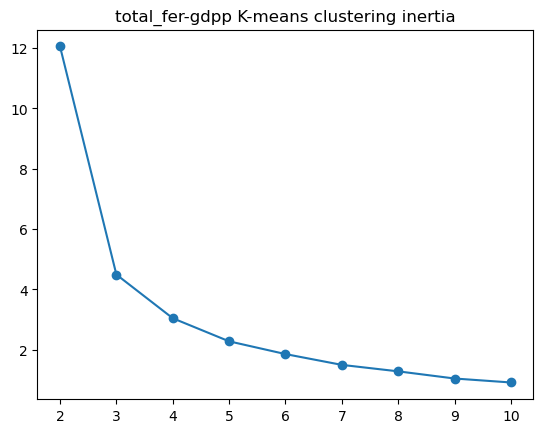

In [193]:
plot_inertia(inertia_list, columns)

In [194]:
K = 3
model = train_model(num_cluster=K, data=data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



TypeError: 'str' object is not callable

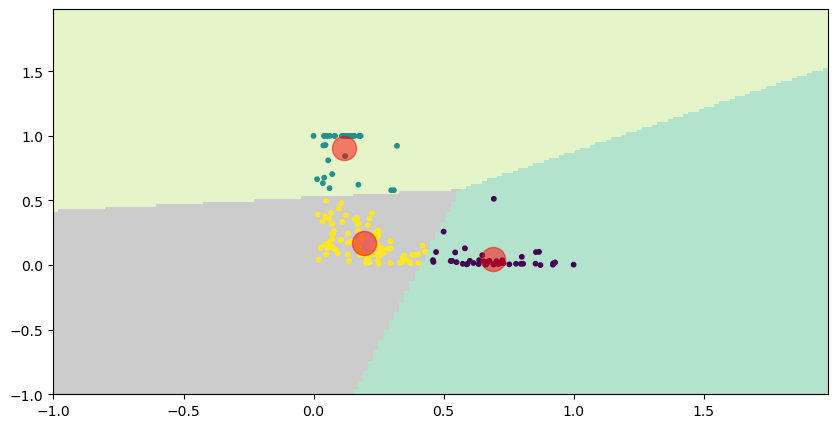

In [195]:
# total_fer & life_expec
xx, yy, Z = inference(model, data)
plot_kmeans_cluster(xx, yy, Z, model, data, columns)

In [ ]:
## export 도 해봐야 하나...유의미한 거 찾기 

In [55]:
# import torch, gc
# gc.collect()
# torch.cuda.empty_cache()

## 2.) dbscan clustering

In [62]:
cur_df = data_train[["total_fer", "income"]]
data = cur_df.values
columns = cur_df.columns

In [63]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

def calculate_knn_distances(k):
    # 몇개의 이웃간의 거리를 측정할 것인지
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors.fit(data)
    knn_distances = neighbors.kneighbors(data)[0]
    knn_distances = np.sort(knn_distances, axis=0)
    return knn_distances


In [64]:
from matplotlib import pyplot as plt

def plot_knn_distance(knn_distances):
    plt.plot(knn_distances[:, -1])
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()

In [65]:
knn_distances = calculate_knn_distances(k=3)
knn_distances

array([[0.        , 0.00180438, 0.01030968],
       [0.        , 0.00180438, 0.01168258],
       [0.        , 0.00341997, 0.01198456],
       [0.        , 0.00341997, 0.01237448],
       [0.        , 0.00512164, 0.01240043],
       [0.        , 0.00512164, 0.01273305],
       [0.        , 0.00599472, 0.01286794],
       [0.        , 0.00599472, 0.01305573],
       [0.        , 0.006686  , 0.0136577 ],
       [0.        , 0.006686  , 0.01536492],
       [0.        , 0.00692806, 0.01536492],
       [0.        , 0.00692806, 0.01538464],
       [0.        , 0.00776656, 0.01547652],
       [0.        , 0.00776656, 0.01547652],
       [0.        , 0.0079733 , 0.0154878 ],
       [0.        , 0.0079733 , 0.0154878 ],
       [0.        , 0.0086813 , 0.01594661],
       [0.        , 0.0086813 , 0.01644448],
       [0.        , 0.00922756, 0.01671218],
       [0.        , 0.00922756, 0.01712645],
       [0.        , 0.00932149, 0.01712645],
       [0.        , 0.00932149, 0.01729457],
       [0.

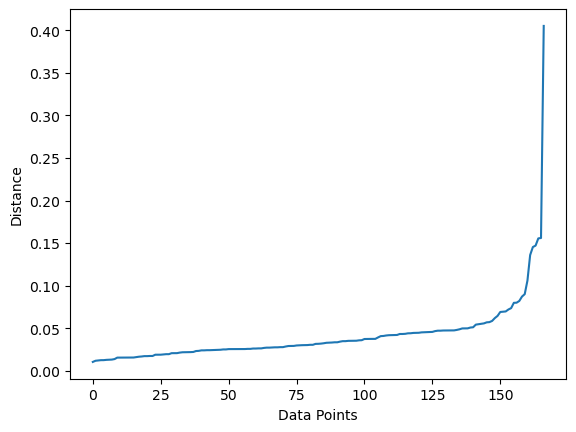

In [66]:
plot_knn_distance(knn_distances)

In [67]:
from sklearn.cluster import DBSCAN
from collections import Counter    # 클러스터링 모델 학습 결과 출력

def train_model(eps, min_pts, data):
    model = DBSCAN(
        eps=eps,
        min_samples=min_pts,
        metric="euclidean",
    )
    model.fit(data)
    
    counter = Counter(model.labels_)   
    for key in sorted(counter.keys()):
        print(f"cluster {key}: {counter[key]}")
    return model

In [68]:
from plotly import graph_objects as go
import plotly


def plot_dbscan_clusters(df, columns):
    layout = go.Layout(
        title= f"{'-'.join(columns)} DBSCAN clustering",
        xaxis_title=columns[0],
        yaxis_title=columns[1],
        width=1000,
        height=600,
        legend={"font": { "size": 20 } }
    )
    
    fig = go.Figure(layout=layout)
    cluster_ids = sorted(set(df["label"].values))
    for cluster_id in cluster_ids:
        cluster_df = df[df["label"]==cluster_id]
        dots = cluster_df.drop(["label"], axis=1).values
        n_dots = len(dots)
        fig.add_trace(go.Scatter(
            x=dots[:, 0],
            y=dots[:, 1],
            mode='markers',
            name=f"cluster: {cluster_id}"
        ))
    plotly.offline.iplot(fig)

cluster -1: 1
cluster 0: 166


C:\Users\82108\AppData\Local\Temp\ipykernel_16596\4046233663.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



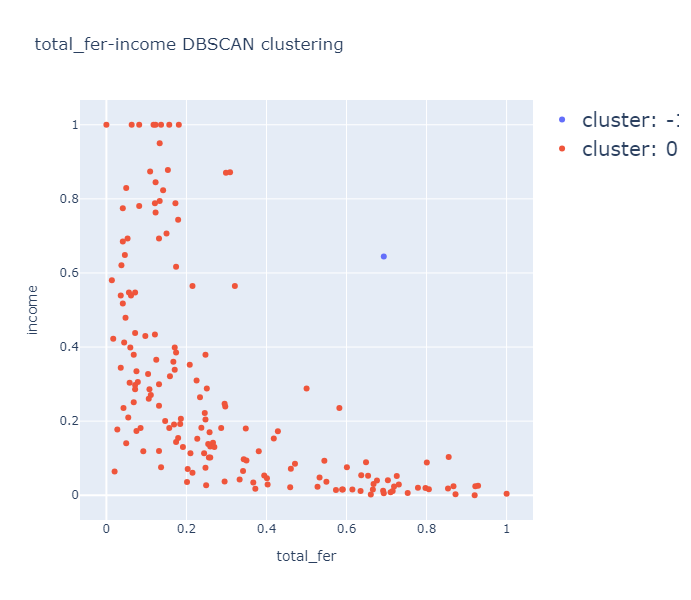

In [72]:
cur_df = data_train[["total_fer", "income"]]
data = cur_df.values
columns = cur_df.columns

eps = 0.15
min_pts = 3
model = train_model(eps=eps, min_pts=min_pts, data=data)
cur_df["label"] = model.labels_
plot_dbscan_clusters(cur_df, columns)

## 3.) hierarchical clustering

In [52]:
data_train.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.624488,0.106853,0.468725,0.441676,0.019490,0.481142,0.234532,0.797268,0.009788
1,0.099804,0.301309,0.385053,0.478126,0.181489,0.306662,0.812950,0.085361,0.117298
2,0.176083,0.413662,0.191714,0.308683,0.239318,0.715897,0.818705,0.297055,0.128545
3,0.829799,0.671856,0.084484,0.421973,0.103021,0.937963,0.346763,0.855314,0.100277
4,0.054892,0.490364,0.342811,0.579594,0.360038,0.199154,0.827338,0.167307,0.363810


In [53]:
from scipy.cluster import hierarchy as hc

In [54]:
X = data_train[["total_fer", "income", "gdpp", "health"]]

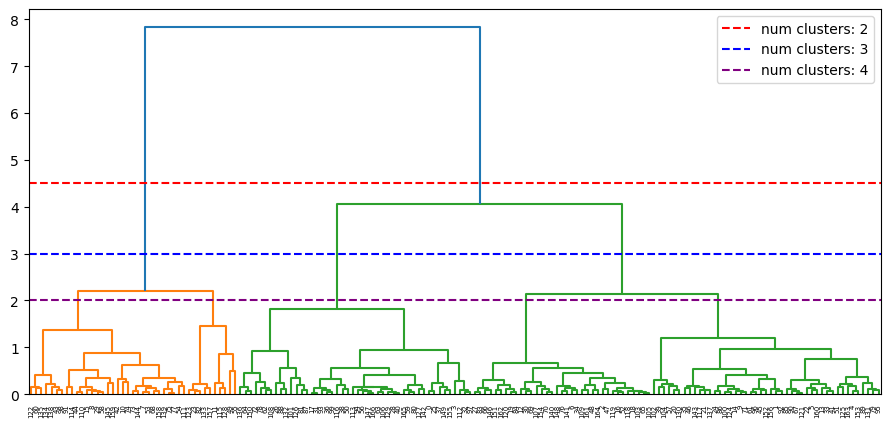

In [55]:
from matplotlib import pyplot as plt

plt.figure(figsize=(11,5))
_= hc.dendrogram(hc.linkage(X, method = "ward"))
# plt.axhline(100000, color="red", linestyle="--", label="num clusters: 2")   # 전체 클러스터는 2개
# plt.axhline(75000, color="blue", linestyle="--", label="num clusters: 3")
# plt.axhline(40000, color="purple", linestyle="--", label="num clusters: 4")
plt.axhline(4.5, color="red", linestyle="--", label="num clusters: 2")   # 전체 클러스터는 2개
plt.axhline(3, color="blue", linestyle="--", label="num clusters: 3")
plt.axhline(2, color="purple", linestyle="--", label="num clusters: 4")
plt.legend()

In [56]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering     # 아래에서부터 뭉쳐나가는 클러스터링      
from tqdm.notebook import tqdm

silhouette_scores = []
for i in tqdm(range(2,8)):
    silhouette_scores.append(
        silhouette_score(X, AgglomerativeClustering(n_clusters = i).fit_predict(X))
    )
    

  0%|          | 0/6 [00:00<?, ?it/s]

In [57]:
silhouette_scores 

[0.5422222214161111,
 0.43414993287715753,
 0.42632075692039734,
 0.3522145161868991,
 0.36979150398279836,
 0.37285409877551207]

<BarContainer object of 6 artists>

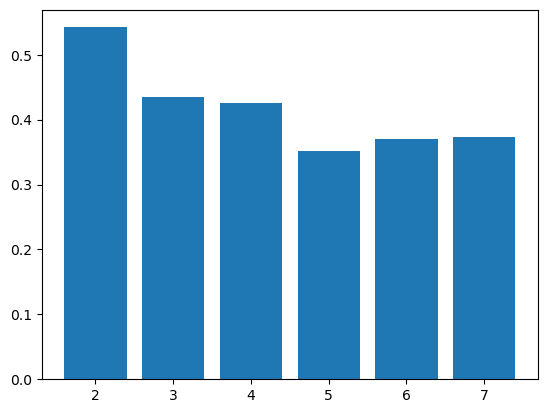

In [58]:
from matplotlib import pyplot as plt

plt.bar(range(2,8), silhouette_scores)

In [59]:
X = data_train[["total_fer", "income", "gdpp","life_expec"]]
model = AgglomerativeClustering(n_clusters = 3, affinity="euclidean", linkage="ward")
data_train["label"] = model.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [60]:
data_train["country"] = df["country"]

In [61]:
data_train.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,country
0,0.624488,0.106853,0.468725,0.441676,0.019490,0.481142,0.234532,0.797268,0.009788,2,Afghanistan
1,0.099804,0.301309,0.385053,0.478126,0.181489,0.306662,0.812950,0.085361,0.117298,0,Albania
2,0.176083,0.413662,0.191714,0.308683,0.239318,0.715897,0.818705,0.297055,0.128545,0,Algeria
3,0.829799,0.671856,0.084484,0.421973,0.103021,0.937963,0.346763,0.855314,0.100277,2,Angola
4,0.054892,0.490364,0.342811,0.579594,0.360038,0.199154,0.827338,0.167307,0.363810,0,Antigua and Barbuda


In [62]:
data_train["label"].value_counts()

label
0    95
2    45
1    27
Name: count, dtype: int64

In [212]:
data_train.drop(['country','exports','imports','inflation','life_expec','child_mort'],axis=1).groupby(["label"]).mean()
# cluster 별로 label

,health,income,total_fer,gdpp
label,,,,
0,0.365137,0.263062,0.193562,0.238243
1,0.568252,0.833644,0.106796,0.994641
2,0.390306,0.050931,0.664590,0.041857


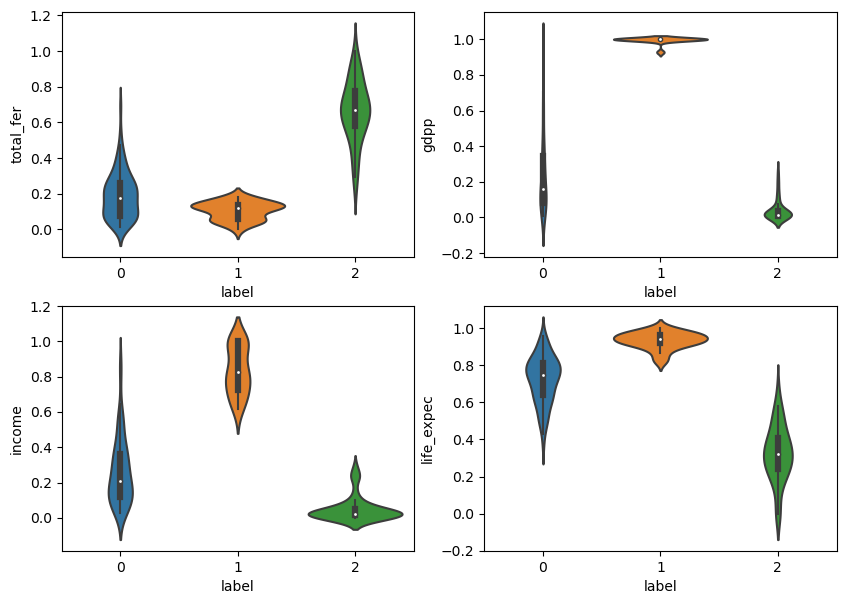

In [63]:
import seaborn as sns
plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
sns.violinplot( data=data_train, x="label", y="total_fer")

plt.subplot(2,2,2)
sns.violinplot(data=data_train, x="label", y="gdpp")

plt.subplot(2,2,3)
sns.violinplot(data=data_train, x="label", y="income")

plt.subplot(2,2,4)
sns.violinplot(data=data_train, x="label", y="life_expec")

plt.show()

In [86]:
data_train[data_train['label']==0].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.0
mean,0.142149,0.450271,0.365137,0.469209,0.263062,0.391325,0.724105,0.193562,0.238243,0.0
std,0.136240,0.220430,0.182366,0.196818,0.186401,0.224311,0.126496,0.129542,0.209804,0.0
min,0.004277,0.000000,0.012998,0.000000,0.026889,0.000000,0.369784,0.013658,0.010973,0.0
25%,0.054892,0.289426,0.246954,0.320997,0.118987,0.215545,0.641727,0.076825,0.083559,0.0
50%,0.105507,0.405019,0.340374,0.479111,0.206217,0.340148,0.746763,0.174136,0.158637,0.0
75%,0.182499,0.572467,0.476442,0.595849,0.362958,0.497533,0.814388,0.258643,0.345573,0.0
max,0.772768,1.000000,1.000000,1.000000,0.872124,1.000000,0.959712,0.693128,0.923098,0.0


In [75]:
45 / 167 *100

26.94610778443114

In [82]:
data_train[data_train['label']==1].sort_values(by=['total_fer'],ascending=[True]).head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,country
133,0.001426,1.000000,0.174655,1.000000,1.000000,0.146775,0.997122,0.000000,1.000000,1,Singapore
139,0.008555,0.274302,0.627945,0.263367,0.620949,0.154036,0.974101,0.037559,0.926138,1,Spain
77,0.004277,0.160869,0.623883,0.133329,0.685203,0.081424,1.000000,0.040973,1.000000,1,Japan
58,0.011406,0.455794,0.795288,0.364835,0.774770,0.175115,0.922302,0.040973,1.000000,1,Germany
42,0.007129,0.541138,0.337937,0.565802,0.648208,0.219246,0.916547,0.046095,0.929177,1,Cyprus


In [83]:
data_train[data_train['label']==1].sort_values(by=['income','gdpp','life_expec'],ascending=[False,False,False]).head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,country
133,0.001426,1.000000,0.174655,1.000000,1.0,0.146775,0.997122,0.000000,1.0,1,Singapore
145,0.013545,0.690221,0.787165,0.524427,1.0,0.159570,0.982734,0.063167,1.0,1,Switzerland
91,0.001426,1.000000,0.484159,1.000000,1.0,0.275996,0.956835,0.081946,1.0,1,Luxembourg
114,0.004277,0.427706,0.623071,0.280114,1.0,0.358125,0.948201,0.136577,1.0,1,Norway
123,0.045625,0.671856,0.000000,0.233813,1.0,0.394431,0.905036,0.157064,1.0,1,Qatar
